# Proyecto de predcción de incumplimiento de pago de crédito.

En este trabajo se presenta el análisis para predecir el incumplimiento de un pago crediticio para 30000 clientes en base a edad, escolaridad, historial de pagos y estado de cuenta actual.



1.   Analizamos los parámetros basicos de estadistica que son correlación, meidas de tendencia central y frecuencias.
2.   Utilizando el método de random forest predecimos el incumplimiento de cada cliente en base su historial. El metodo de random forest presenta ventajas debido a que los datos obtenidos tienen mayor "ruido" en el sentido de que presentan mayor dispersión entre ellos.



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Importar Datos de .cvs a python


In [18]:

import pandas as pd
credito = pd.read_csv("Tabla de pagos.csv")
credito

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,MONTO_CREDITO,SEXO,ESCOLARIDAD,ESTADO_CIVIL,EDAD,ESTADO_PAGO_SEP,ESTADO_PAGO_AGO,ESTADO_PAGO_JUL,ESTADO_PAGO_JUN,...,ESTADO_CUENTA_JUN,ESTADO_CUENTA_MAY,ESTADO_CUENTA_ABR,MONTO_PAGO_SEP,MONTO_PAGO_AGO,MONTO_PAGO_JUL,MONTO_PAGO_JUN,MONTO_PAGO_MAY,MONTO_PAGO_ABR,INCUMPLIMIENTO_PAGO
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


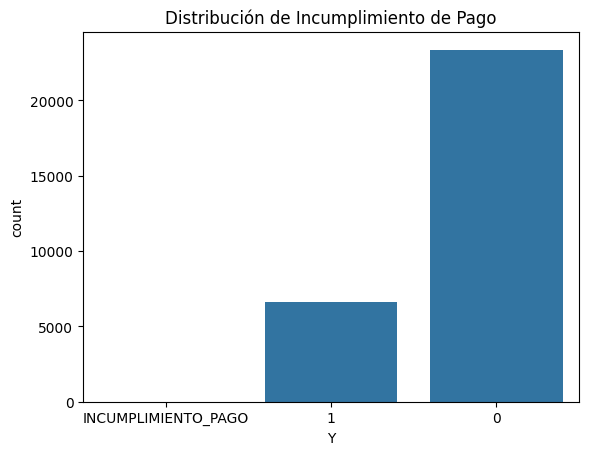

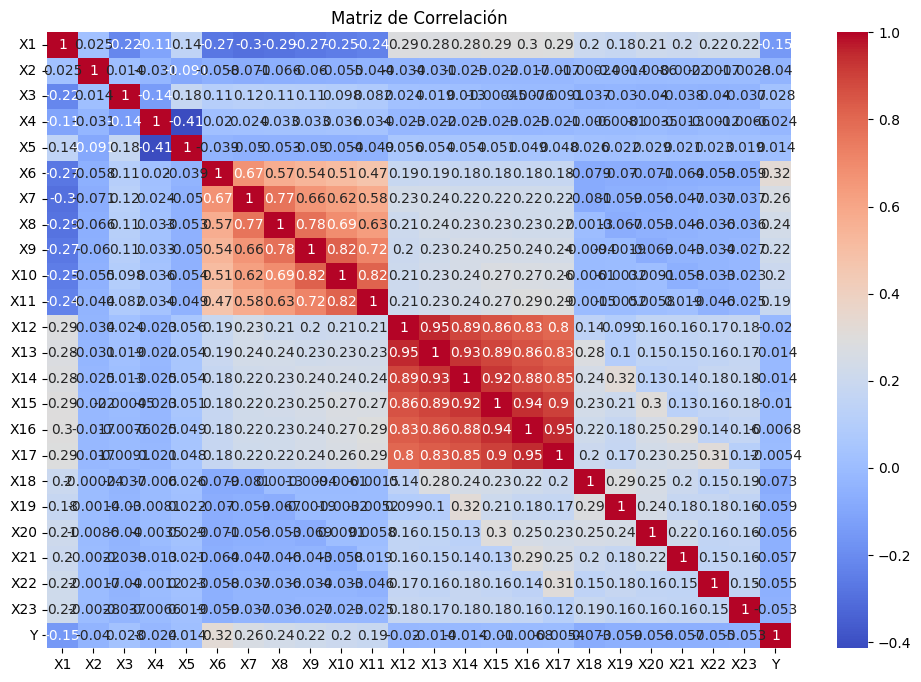

In [12]:

#print(credito.info())

# Estadísticas descriptivas
#print(credito.describe())

# Distribución de la variable objetivo (Incumplimiento de pago)
sns.countplot(x='Y', data=credito)
plt.title('Distribución de Incumplimiento de Pago')
#plt.show()


credito = credito.drop(0)
credito0 = credito.drop('X0', axis=1)

# Matriz de correlación
corr_matrix = credito0.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()







#Tabla de Frecuencias para los montos prestados.
Hacemos una tabla de frecuencias para los montos de crédito.

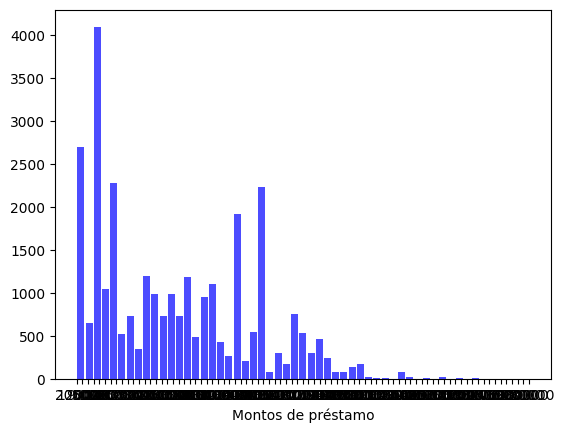

In [13]:
import matplotlib.pyplot as plt

# Distribución de los montos de préstamo
patches = plt.hist(x=credito['X1'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Montos de préstamo")
plt.show()

In [10]:
credito

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#Calculo de dispersión en cada columna

Calculamos lavarianza en cada una de las columnas.




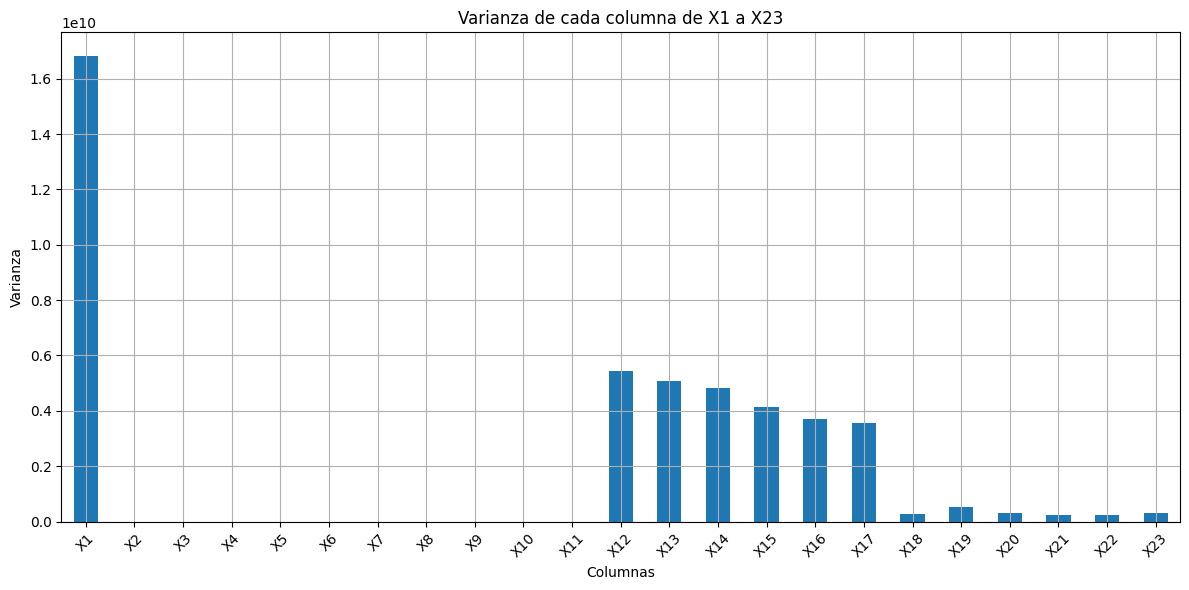

In [32]:
import pandas as pd
import matplotlib.pyplot as plt



# Convertir las columnas de X1 a X23 a formato numérico
columnas = [f'X{i}' for i in range(1, 24)]
credito[columnas] = credito[columnas].apply(pd.to_numeric, errors='coerce')

# Calcular la varianza de cada columna
varianzas = credito[columnas].var()

# Mostrar las varianzas calculadas
#print(varianzas)

# Graficar las varianzas
plt.figure(figsize=(12, 6))
varianzas.plot(kind='bar')
plt.title('Varianza de cada columna de X1 a X23')
plt.xlabel('Columnas')
plt.ylabel('Varianza')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Identificación de medidas de tendencia central.

Esta linea de código calcula la media, mediana y moda de cada columna.


1.   Se calculculan los datos atípicos mediante percentiles.

2.   Se da la opción de introducir la celda que se desea para obtener lasgráficaslas medidas de la celda seleccionada.



Introduce el nombre de la columna que quieres analizar: X22
Media: 4799.387633333334
Mediana: 1500.0
Moda: 0.0


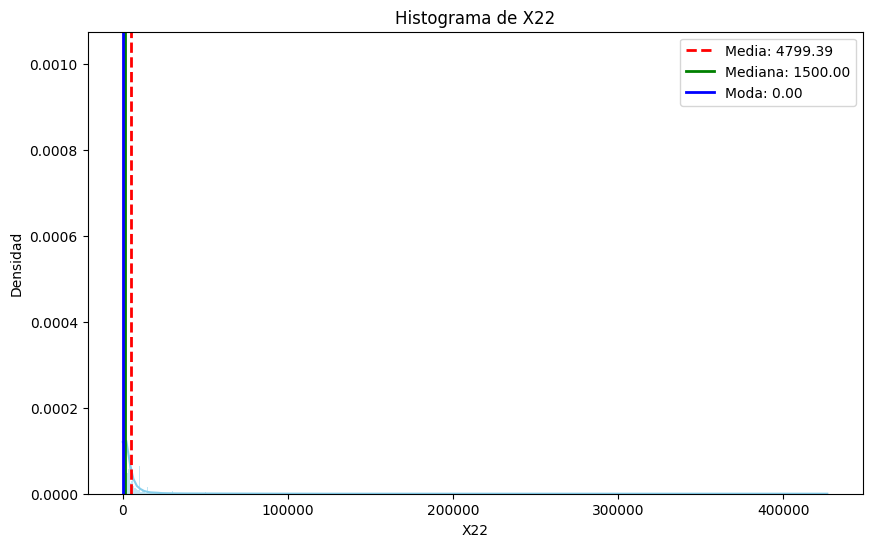

In [30]:
def plot_statistics(column_name):
    if column_name not in credito.columns:
        print(f'La columna {column_name} no existe en el DataFrame.')
        return

    column_data = credito[column_name]

    # Calcular media, mediana y moda
    mean = column_data.mean()
    median = column_data.median()
    mode = column_data.mode()[0]  # Puede haber más de una moda; tomamos la primera

    # Imprimir estadísticas
    print(f'Media: {mean}')
    print(f'Mediana: {median}')
    print(f'Moda: {mode}')

    # Crear la gráfica
    plt.figure(figsize=(10, 6))

    sns.histplot(column_data, kde=True, color='skyblue', stat='density', linewidth=0)
    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Media: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Mediana: {median:.2f}')
    plt.axvline(mode, color='blue', linestyle='-', linewidth=2, label=f'Moda: {mode:.2f}')

    plt.legend()
    plt.title(f'Histograma de {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Densidad')
    plt.show()

# Elegir una columna
column_name = input('Introduce el nombre de la columna que quieres analizar: ')
plot_statistics(column_name)



#Correlacion con Escolaridad, Edad
Ahora, analizarems como es la correlación de los historiales de puntaje crediticion respecto de las variables Escolaridad, Estado Civil y Edad. Usaremos la Columa X6

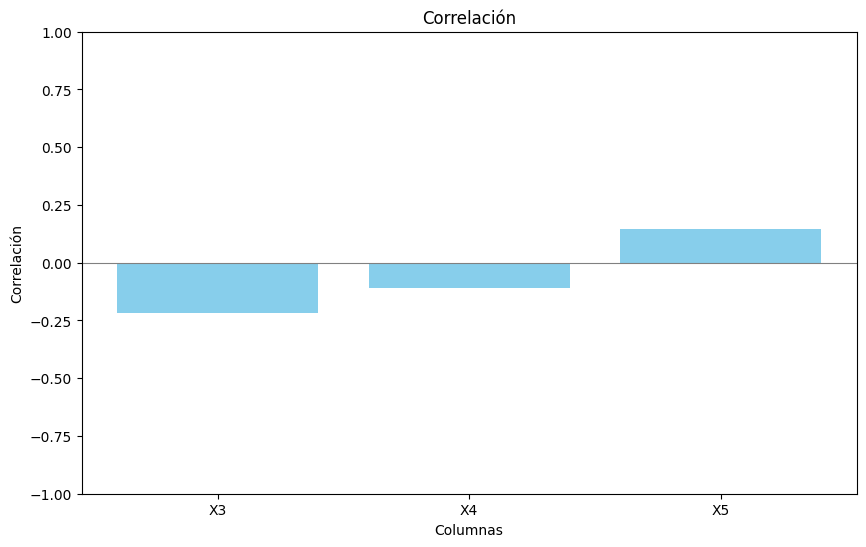

In [79]:
# Seleccionar la columna X1 y las columnas X3 a X5
column_X1 = credito.columns[1]  # Asumiendo que X1 es la segunda columna
variables = credito.columns[3:6]

# Convertir las columnas seleccionadas a tipo float
data_X1 = credito[column_X1].astype(float)
data_3_to_5 = credito[variables].astype(float)

# Calcular la correlación de la columna X1 con cada columna de X3 a X5
correlation_results = {}
for col in variables:
    correlation = data_X1.corr(data_3_to_5[col])
    correlation_results[col] = correlation


correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Column', 'Correlation'])

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(correlation_df['Column'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Correlación')
plt.title(f'Correlación')
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=0.8)
plt.show()



Anallizamosinformacion mediante una tabla de datos cruzados

In [81]:
print(pd.crosstab(credito['X1'], credito['X2'], margins = True))

X2           1      2    All
X1                          
10000      306    187    493
100000     377    671   1048
1000000      0      1      1
110000     220    368    588
120000     239    487    726
...        ...    ...    ...
780000       1      1      2
80000      524   1043   1567
800000       2      0      2
90000      190    461    651
All      11888  18112  30000

[82 rows x 3 columns]


Preparamos el conjunto de datos como los datos de entrenamiento y los datos de prueba.

In [ ]:

# Separar características (X) y variable objetivo (y)
X = credito.drop(['X0','Y'], axis=1)
y = credito['Y']


# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#Predicción de incumplimiento




1.   Si la probabilidad obtenida es menor o igual a 0.5 entonces asignamos 0.
2.   Si la probabilidad es mayor a 0.5 entonces le asignamos el valor 1.





Ahora sepramos los datos en el conjunto de entreamiento y el conjunto de prueba.

In [90]:
X = credito.loc[:,credito.columns != 'X1']
y = credito[['Y']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





#Escalamiento de los datos
Reesalamos los datos en base a la varianza de cada columna.

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# El Modelos clásico de regresión lineal da como resultados una columan de ceros.

Como modelo  para la predicción de datos sobre el incumplimiento de pago tulizaremos el modelos de Random Forest. Este reuslta de utilidad cuando tenemos un conjunto grande de datos robustos. En comparaión de otros modelos, como el de regresiónlogística donde el conjunt de datos "ruidosos" son menos dipersos.

Agregaremos un ejemplo hecho con logistic regresión donde la predicción de incumplimiento solo genera una columa de ceros de cada unos de los clientes.



In [ ]:
# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
predicy=pd.DataFrame(y_pred, columns= ['Cumplimiento'])

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#print(f'Accuracy: {accuracy:.2f}')
#print('Confusion Matrix:')
#print(conf_matrix)
#print('Classification Report:')
#print(class_report)
#print(y_pred)
predicy

# Hacer predicciones en nuevos datos (opcional)
#new_predictions = model.predict(X_test)  # Aquí puedes usar nuevos datos en lugar de X_test
#print('New Predictions:')
#print(new_predictions)


#Usareos el predictor de RandomForest.
Debido a la cantidad de datos y a la robustes el mejor modelo para predecir los datos en el RandomForest.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Probar con Random Forest
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

predictiony=pd.DataFrame(y_pred_rf, columns=['Puntualidad'])


# Evaluar Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Confusion Matrix (Random Forest):')
print(confusion_matrix(y_test, y_pred_rf))
print('Classification Report (Random Forest):')
print(classification_report(y_test, y_pred_rf))

<ipython-input-98-4936a2c9e3b8>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


Random Forest Accuracy: 1.00
Confusion Matrix (Random Forest):
[[4687    0]
 [   0 1313]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4687
           1       1.00      1.00      1.00      1313

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [ ]:
predictiony

# Probabilidad de que una persona no pague
Predecir el pago de incumplimiento de pagos: utilizaremos una regresión del tipo logística para predecir con icerta probabilidad el pago de cada unos de los clientes.

In [100]:
# Variables independientes y dependiente
X = credito.loc[:,credito.columns != 'X1']
y = credito[['Y']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

 #Entrenamiento del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Predicciones de probabilidad para el estado del préstamo usando datos de prueba
preds = clf_logistic.predict_proba(X_test)

# Marcos de datos de las primeras cinco predicciones y las primeras cinco etiquetas verdaderas
preds_df = pd.DataFrame(preds[:,1][0:credito['X2'].count()], columns = ['prob_default'])
true_df = y_test.head(credito['X2'].count())
print(preds_df)
#print(true_df)
# Comparación de los dos marcos de datos
#print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


       prob_default
0          0.206515
1          0.171827
2          0.298771
3          0.223954
4          0.263948
...             ...
11995      0.234542
11996      0.265795
11997      0.334190
11998      0.237950
11999      0.273216

[12000 rows x 1 columns]


# Datos Finales




1.   Ahora solo unimos el DataFrame de credito juntos con las predicciones y
probabilidades de que un cleinte no pague.
2. Se crea el archivo .xls y .cvs con la informacón final






In [62]:
credito['prob_default'] = preds_df['prob_default']
credito.to_excel('credito.xlsx', index=False)

